In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd
#Load the train and validation sets
train_df=pd.read_csv("/content/drive/MyDrive/data/Artificial inteligence II/vaccine_train_set.csv",index_col=0)
val_df=pd.read_csv("/content/drive/MyDrive/data/Artificial inteligence II/vaccine_validation_set.csv",index_col=0)

In [25]:
#Checks that there aren't any null values
print(train_df.head())
print(train_df.shape)
print(train_df.isnull().sum())
#print the portion of each class for the train set
print(train_df.groupby("label").count())

                                               tweet  label
0  Sip N Shop Come thru right now #Marjais #Popul...      0
1  I don't know about you but My family and I wil...      1
2  @MSignorile Immunizations should be mandatory....      2
3  President Obama spoke in favor of vaccination ...      0
4  "@myfoxla: Arizona monitoring hundreds for mea...      0
(15976, 2)
tweet    0
label    0
dtype: int64
       tweet
label       
0       7458
1       2073
2       6445


In [26]:
#Checks that there aren't any null values
print(val_df.head())
print(val_df.shape)
print(val_df.isnull().sum())
#print the portion of each class for the train set
print(val_df.groupby("label").count())

                                               tweet  label
0  @user They had a massive surge in with covid d...      1
1  Required vaccines for school: Parents and guar...      0
2  “@KCStar: Two more Johnson County children hav...      0
3  NV can do better. Which states are the best (a...      2
4  Nothing like killing ourselves w/ our own fear...      2
(2282, 2)
tweet    0
label    0
dtype: int64
       tweet
label       
0       1065
1        296
2        921


In [27]:
import numpy as np
#open the pretrained embendings
Glove_file=open('/content/drive/MyDrive/data/Artificial inteligence II/glove.twitter.27B.200d.txt',encoding="utf8")
glove_vectors=dict()

#load the pretrain embedings to use them
for line in Glove_file:

    values=line.split()
    word=values[0]
    vectors=np.asarray(values[1:]).astype(np.float64)
    glove_vectors[word]=vectors

Glove_file.close()
#save them into a dictionary with form=> word(key): vector_with_shape(200,1) (value)
print(len(glove_vectors.keys()))

1193514


In [28]:
#Example: Print an embending of the word "woah"
print(glove_vectors["woah"])

[ 0.35049   -0.092346  -0.21949   -0.082786  -0.33759   -0.313
  0.75483   -0.045466  -0.16005    0.1852     0.049366   0.16048
  0.078113  -0.16777   -0.017527   0.32436    0.55093    0.18986
  0.17321   -0.26016    0.2022     0.20981    0.27178   -0.21254
 -0.21969    1.1221    -0.38136   -0.2081     0.18409   -0.47501
  0.27519   -0.051902  -0.034876  -0.31578   -0.29349    0.28474
 -0.077157  -0.42709   -0.050599  -0.51074    0.34047   -0.057103
 -0.087408   0.027009  -0.26078   -0.10273    1.1167     0.39918
 -0.55439    1.0249    -0.1998    -0.26164   -0.43768   -0.49712
  0.25035    0.12851    0.2093    -0.42327   -0.36178   -0.22508
  0.15384    0.28213    0.0079844 -0.2828    -0.23619    0.41811
 -0.11467    0.55878    0.10266    0.01856    0.31456    0.57663
 -0.00869    0.12738   -0.34583    0.2507     0.49821    0.20216
 -0.12245    0.19284    0.077367   0.078366  -0.45167    0.010687
  0.31628   -0.58084   -0.29625   -0.31293   -0.087788  -0.11117
  0.3828     0.056562  -0

In [29]:
#function to remove the emojis fron a string
#This will be used for the cleance of the tweets
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [30]:
# Prepare stopword list
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import TreebankWordTokenizer
import string
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords as sw

#cleance the tweets and tokenize them
def cleance_tokenizer(my_df):
    custom_stopwords=sw.words('english')
    #Cleaning
    #The 2 lines below is the code where I remove the links, the stopwords, and the punctuations from train set
    #remove links
    my_df["Filtered_words"]=my_df["tweet"].apply(lambda row:re.sub(r'http\S+', '', row))
    #custom punctuation
    my_punct=string.punctuation.replace("'","")
    #remove punctuation and make all the leters lowercase
    my_df["Filtered_words"]=my_df['Filtered_words'].apply(lambda x: ' '.join([word.translate(str.maketrans('', '', string.punctuation)).lower() for word in word_tokenize(x) if word not in (custom_stopwords)]))
    #remove digits
    my_df["Filtered_words"]=my_df["Filtered_words"].apply(lambda x: re.sub(r'\d+', '', x))
    #remove emojis
    my_df["Filtered_words"]=my_df["Filtered_words"].apply(lambda x:deEmojify(x))
    #tokenize the filtered words
    my_df['token_words']=my_df['Filtered_words'].apply(lambda x: TreebankWordTokenizer().tokenize(x))
    my_df.head()

cleance_tokenizer(train_df)
cleance_tokenizer(val_df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
import numpy as np

# the function that will take the previous tokenized words and take the mean of the pre-trained embending of the words that consists the tweet
def tweets_to_vectors(tweets_set,dim):
    #tweets_set=tweets_set.apply(lambda x: TreebankWordTokenizer().tokenize(x))
    tweets_vectors=[]
    #the total words on tweets that does not have an embending match
    count=0
    #the total words on tweets that have an embending match
    count_found=0
    #a set that keeps all the words that were matched with an already word that has a pretrained embending
    found_set=set()
    #set that keeps track of all the words which does not have a pretrained embending
    nt_found_set=set()
    for index, row in tweets_set.iteritems():
        #print(index,row)
        #words= TreebankWordTokenizer().tokenize(row)
        word_vectors=[]
        for w in row:
            vector=glove_vectors.get(w)
            if vector is not None:
                count_found+=1
                word_vectors.append(vector)
                found_set.add(w)
            else:
                count+=1
                word_vectors.append(np.zeros(dim))
                #print(w)
                nt_found_set.add(w)
        #print(word_vectors)
        tweets_vectors.append([np.mean(k) for k in zip(*word_vectors)])
    #print the total words to the words that there wasn't any embending    
    print(count_found, count)
    print(len(found_set), len(nt_found_set)) 
    return  tweets_vectors  

#for each tokenize 
#a vector for each tweets in train set
train_tweets_embendings=tweets_to_vectors(train_df['token_words'],200)
#a vector for each tweets in validation set
val_tweets_embendings=tweets_to_vectors(val_df['token_words'],200)

182581 17432
15617 9646
25947 2395
5638 1681


In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

y_df = pd.DataFrame(train_df, columns=['label'])
#x-create the tensor for the train_tweets_embendings
x = torch.tensor(train_tweets_embendings, dtype=torch.float)
#y-create the tensor for the labels of the train set
y = torch.tensor(y_df.values, dtype=torch.float)

#val_x-create the tensor for the validation_tweets_embendings
val_x=torch.tensor(val_tweets_embendings, dtype=torch.float)
#y-create the tensor for the labels of the validation set
val_y_df = pd.DataFrame(val_df, columns=['label'])
val_y = torch.tensor(val_y_df.values, dtype=torch.float)

# print(y[1])
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

x shape: torch.Size([15976, 200])
y shape: torch.Size([15976, 1])


In [35]:
#My Neural Network model, with 3 layers 128-64-32 and activation function ReLU6
class NNet(nn.Module):
    
    def __init__(self, D_in, H1, H2, H3, D_out):
        activation_f=nn.LeakyReLU        #the activation function
        super(NNet, self).__init__()
        self.linear_relu_stack = nn.Sequential(
        nn.Linear(D_in, H1),        #first layer
        nn.Dropout(0.4),            #dropout layer
        activation_f(),             #activation function
        nn.Linear(H1, H2),          #second layer
        nn.Dropout(0.2),            #second dropout layer
        activation_f(),             #activation function for the second layer
        nn.Linear(H2, H3),          #last layer
        activation_f(),             #activation function for last hidden layer
        nn.Linear(H3, D_out),       #output layer with 3 neurons
        )
    def forward(self, x):
        out = self.linear_relu_stack(x)
        return out #torch.relu(out)

In [37]:
from sklearn.utils import class_weight
#Define layer sizes
D_in = x.shape[1] #dimensions of each vector
H1 = 128
H2 = 64
H3 = 32
D_out = 3

#Define Hyperparameters
learning_rate = 0.000007 #0.00001

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

#initialize the class weights in a balanced way
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(train_df.label), y=train_df.label)
class_weights = torch.tensor(class_weights,dtype=torch.float)

#Initialize model, loss, optimizer
model = NNet(D_in, H1, H2, H3, D_out).to(device)  #my neural Network
loss_func = nn.CrossEntropyLoss(weight=class_weights)   #Loss Function
optimizer = torch.optim.Adamax(model.parameters(), lr=learning_rate)  #Adamax optimizer

#Initialize dataloader
train_dataset = torch.utils.data.TensorDataset(x, y)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
#validation data loaders
val_dataset = torch.utils.data.TensorDataset(val_x, val_y)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=True)



Using cpu device


In [38]:
#a function to calculate the accuracy given the predictions of each class and the truly label
def multiclass_accuracy(predictions, targets):
    y_pred_softmax = torch.log_softmax(predictions, dim = 1)
    #the label that the tweet belongs to will be the one with the highest propability
    predicts=torch.argmax(y_pred_softmax,1)
    corrects_found=(torch.squeeze(targets) == predicts).float()
    return corrects_found.sum()/len(corrects_found)

In [39]:
epochs=[]
losses=[]
accuracies=[]
val_losses=[]
val_accuracies=[]
for epoch in range(600):
    batch_losses = []
    batch_accuracies = []
    epochs.append(epoch)
    epoch_acc=0
    for x_batch, y_batch in train_dataloader:
        x_batch=x_batch.to(device=device)
        y_batch=y_batch.to(device=device)

        y_pred = model(x_batch)
        loss = loss_func(y_pred.squeeze(1), y_batch.squeeze(1).long())     
        batch_losses.append(loss.item())
        #Delete previously stored gradients
        optimizer.zero_grad()
        #Perform backpropagation starting from the loss calculated in this epoch
        loss.backward()
        #Update model's weights based on the gradients calculated during backprop
        optimizer.step()
        
        #take the index of the max among the 3 options
        #calculate the accuracy
        batch_acc=multiclass_accuracy(y_pred,y_batch)
        batch_accuracies.append(batch_acc)

    # VALIDATION    
    with torch.no_grad():
        
        val_batch_losses = []
        val_batch_accuracies = []
        
        model.eval()
        for X_val_batch, y_val_batch in val_dataloader:
            X_val_batch=X_val_batch.to(device=device)
            y_val_batch=y_val_batch.to(device=device)
            #make the predictions based on the current trained model
            y_val_pred = model(X_val_batch)
            #calculate the loss function
            val_loss = loss_func(y_val_pred.squeeze(1), y_val_batch.squeeze(1).long())
            val_batch_losses.append(val_loss)
            #calculate the accuracy
            val_acc = multiclass_accuracy(y_val_pred, y_val_batch)
            val_batch_accuracies.append(val_acc)



    loss=sum(batch_losses)/len(train_dataloader)
    print(f"Epoch {epoch:3}: Loss = {loss:.5f}")
    acc=sum(batch_accuracies)/len(train_dataloader)
    print(f"Accuracy = {acc:.5f}")
    losses.append(loss)
    accuracies.append(acc)
    #validation scores
    val_loss=sum(val_batch_losses)/len(val_dataloader)
    print(f"VAL_Loss = {val_loss:.5f}")
    val_acc=sum(val_batch_accuracies)/len(val_dataloader)
    print(f"VAL_Accuracy = {val_acc:.5f}")
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

Epoch   0: Loss = 1.09876
Accuracy = 0.43187
VAL_Loss = 1.09825
VAL_Accuracy = 0.47552
Epoch   1: Loss = 1.09823
Accuracy = 0.48519
VAL_Loss = 1.09760
VAL_Accuracy = 0.49010
Epoch   2: Loss = 1.09774
Accuracy = 0.48956
VAL_Loss = 1.09777
VAL_Accuracy = 0.48290
Epoch   3: Loss = 1.09715
Accuracy = 0.48888
VAL_Loss = 1.09702
VAL_Accuracy = 0.49271
Epoch   4: Loss = 1.09646
Accuracy = 0.49544
VAL_Loss = 1.09669
VAL_Accuracy = 0.49340
Epoch   5: Loss = 1.09596
Accuracy = 0.49837
VAL_Loss = 1.09601
VAL_Accuracy = 0.49722
Epoch   6: Loss = 1.09489
Accuracy = 0.50612
VAL_Loss = 1.09534
VAL_Accuracy = 0.50538
Epoch   7: Loss = 1.09428
Accuracy = 0.50694
VAL_Loss = 1.09387
VAL_Accuracy = 0.50330
Epoch   8: Loss = 1.09332
Accuracy = 0.50819
VAL_Loss = 1.09273
VAL_Accuracy = 0.51155
Epoch   9: Loss = 1.09222
Accuracy = 0.51425
VAL_Loss = 1.09165
VAL_Accuracy = 0.51241
Epoch  10: Loss = 1.09123
Accuracy = 0.52025
VAL_Loss = 1.09053
VAL_Accuracy = 0.51519
Epoch  11: Loss = 1.09024
Accuracy = 0.5231

tensor(0.6726)
tensor(0.6618)


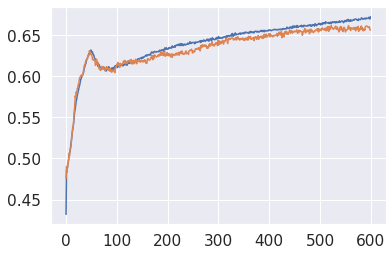

In [40]:
import matplotlib.pyplot as plt
#plot the accuracy arcoding to the epochs
plt.plot(epochs,accuracies)
plt.plot(epochs,val_accuracies)
print(max(accuracies))
print(max(val_accuracies))

0.7426046977043151
tensor(0.7686)


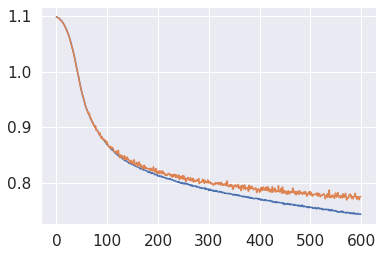

In [41]:
import matplotlib.pyplot as plt
#plot the error acording to the epochs
plt.plot(epochs,losses)
plt.plot(epochs,val_losses)
print(min(losses))
print(min(val_losses))

In [42]:
#make predictions for the validation set
with torch.no_grad():
    val_pred=model(val_x)
    print(val_pred)
    print(multiclass_accuracy(val_pred,val_y))

tensor([[-0.4852,  1.2171, -0.3121],
        [-0.1781, -0.1650,  0.4533],
        [ 1.1393, -1.6265,  0.5057],
        ...,
        [-0.7665,  0.0219,  0.5908],
        [-0.2462, -0.4707,  0.6537],
        [ 0.3795, -0.9955,  0.5668]])
tensor(0.6578)


In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

#a function to calculate the scores given the predictions of each class and the truly label
def multiclass_scores(predictions, targets):
    y_pred_softmax = torch.log_softmax(predictions, dim = 1)
    #the label that the tweet belongs to will be the one with the highest propability
    predicts=torch.argmax(y_pred_softmax,1)
    print(classification_report(torch.squeeze(targets), predicts))
    print("Accuracy: "+ str(accuracy_score(torch.squeeze(targets),predicts)))
    print("F1_score: "+str(f1_score(torch.squeeze(targets),predicts,average='macro')))
    print("Precision: "+str(precision_score(torch.squeeze(targets),predicts,average='macro')))
    print("Recall: "+str(recall_score(torch.squeeze(targets),predicts,average='macro')))


multiclass_scores(val_pred,val_y)    

              precision    recall  f1-score   support

         0.0       0.82      0.71      0.76      1065
         1.0       0.36      0.68      0.47       296
         2.0       0.67      0.59      0.63       921

    accuracy                           0.66      2282
   macro avg       0.62      0.66      0.62      2282
weighted avg       0.70      0.66      0.67      2282

Accuracy: 0.6577563540753725
F1_score: 0.6215319487440252
Precision: 0.6190936903768773
Recall: 0.6599074472463012


In [44]:
#ROC Curve calculations
from sklearn.metrics import roc_curve, auc
#acc, val_final_predicts=multiclass_accuracy_predictions(val_pred,val_y)
fpr = dict()
tpr = dict()
roc_auc = dict()

num_val_y=val_y.squeeze().numpy().astype(int)
#print(num_val_y.shape)
#making the label of validation set one-hot encoding
b_num_val_y = np.zeros((num_val_y.size, num_val_y.max()+1))
b_num_val_y[np.arange(num_val_y.size),num_val_y] = 1

for i in range(3):

    fpr[i], tpr[i], _ = roc_curve(b_num_val_y[:,i], val_pred[:,i])
    #print(fpr[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

(2282,)
(2282,)
(2282,)


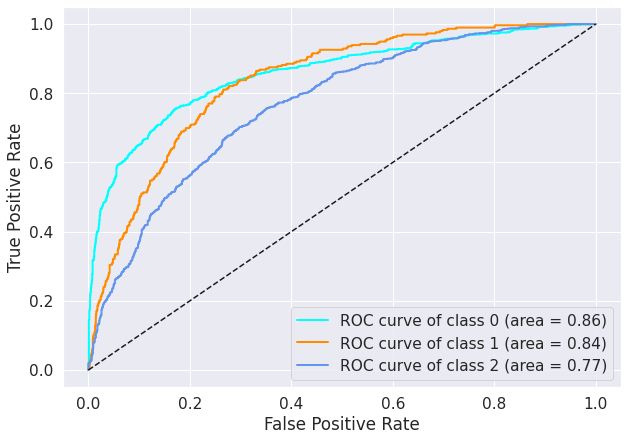

In [45]:
from itertools import cycle
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
plt.figure(figsize = (10,7))
for i, color in zip(range(3), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()    

[[755 119 191]
 [ 23 201  72]
 [145 231 545]]


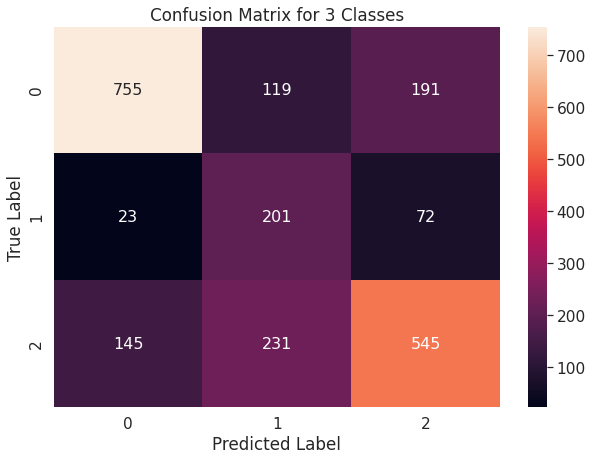

In [46]:
#The confusion matrix of my predictions
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

val_max=torch.argmax(val_pred, dim=1)
cm=confusion_matrix( y_true=val_y.squeeze(1), y_pred=val_max,labels=[0,1,2])
print(cm)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(cm, annot=True, annot_kws={"size": 16},fmt='g') # font size
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix for 3 Classes")
plt.show()